✅ Dataset loaded successfully!
   logins_per_week  time_spent_hours  support_tickets subscription_plan  \
0                6          3.785487                9        Enterprise   
1               19          6.813108                6        Enterprise   
2               28          2.024475                6        Enterprise   
3               14         14.315360                7        Enterprise   
4               10          9.132002                0             Basic   

  payment_history  churn  
0         Default      0  
1            Late      1  
2         On-time      1  
3         Default      0  
4         Default      0  

Shape: (1000, 6)

✅ Data split complete:
Train size: (800, 7) Test size: (200, 7)

🎯 Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}

🔹 Baseline Model
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       146
           1       0.33      0.09      0.14        54

    accu

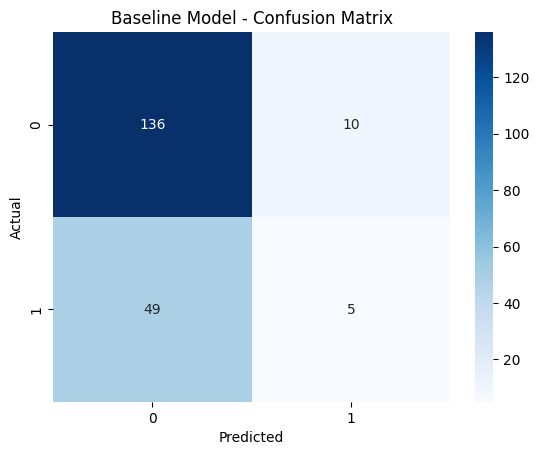


🔹 Tuned Model
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       146
           1       0.00      0.00      0.00        54

    accuracy                           0.73       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.73      0.62       200

✅ Accuracy: 0.7300, Precision: 0.5329, Recall: 0.7300, F1: 0.6161


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

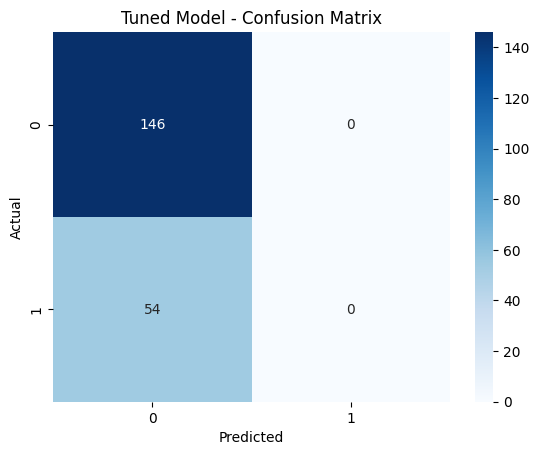


✅ Model saved as classification_model.pkl


In [1]:
# ==============================
# Supervised Learning with Hyperparameter Tuning
# Works with /content/drive/MyDrive/saas_churn_data.csv
# ==============================

# 📦 Install & Import Libraries
!pip install scikit-learn joblib seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,
    mean_squared_error, r2_score
)

# -------------------------------
# 1. Load Dataset
# -------------------------------
file_path = "/content/drive/MyDrive/saas_churn_data.csv"
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(df.head())
print("\nShape:", df.shape)

# -------------------------------
# Choose Task Type: "classification" or "regression"
# -------------------------------
task_type = "classification"   # change to "regression" if target is numeric

# -------------------------------
# 2. Preprocess Data
# -------------------------------
# Assume target column is named 'churn' (change if different in your dataset)
target_col = "churn"

# Convert categorical churn to numeric if needed
if task_type == "classification":
    if df[target_col].dtype == 'object':
        df[target_col] = df[target_col].map({"Yes": 1, "No": 0}).fillna(df[target_col])

# Handle categorical features (one-hot encode if needed)
df = pd.get_dummies(df, drop_first=True)

# Split features & target
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n✅ Data split complete:")
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# -------------------------------
# 3. Model Training + Hyperparameter Tuning
# -------------------------------
if task_type == "classification":
    # Baseline model
    base_model = RandomForestClassifier(random_state=42)
    base_model.fit(X_train, y_train)

    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }
    grid = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    tuned_model = grid.best_estimator_
    print("\n🎯 Best Parameters:", grid.best_params_)

else:  # regression
    # Baseline model
    base_model = DecisionTreeRegressor(random_state=42)
    base_model.fit(X_train, y_train)

    # Hyperparameter tuning
    param_grid = {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }
    grid = GridSearchCV(
        DecisionTreeRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    tuned_model = grid.best_estimator_
    print("\n🎯 Best Parameters:", grid.best_params_)

# -------------------------------
# 4. Evaluation
# -------------------------------
def evaluate_classification(model, X_test, y_test, title="Model Evaluation"):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n🔹 {title}")
    print(classification_report(y_test, y_pred))
    print(f"✅ Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{title} - Confusion Matrix")
    plt.show()

def evaluate_regression(model, X_test, y_test, title="Model Evaluation"):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n🔹 {title}")
    print(f"✅ MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{title} - Predictions vs Actuals")
    plt.show()

# Evaluate baseline & tuned
if task_type == "classification":
    evaluate_classification(base_model, X_test, y_test, "Baseline Model")
    evaluate_classification(tuned_model, X_test, y_test, "Tuned Model")
else:
    evaluate_regression(base_model, X_test, y_test, "Baseline Model")
    evaluate_regression(tuned_model, X_test, y_test, "Tuned Model")

# -------------------------------
# 5. Save Model
# -------------------------------
model_filename = f"{task_type}_model.pkl"
joblib.dump(tuned_model, model_filename)
print(f"\n✅ Model saved as {model_filename}")
